## Общие методы для обработки данных
В данном разделе будут находится общие методы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# читаем данные и создаём таблицу
def data_loader(path: str):
    return pd.read_csv(path)

# преобразуем данные так, как нам необходимо
def data_type_and_date_transform(data: pd.DataFrame) ->pd.DataFrame:
    data = data.replace(",", "", regex=True)
    data.Date = pd.to_datetime((data.Date - 25200) * 1e9 ) # Почему-то данные смещены на 7 часов относительно торгов(возможно, и не на 7, но при данном смещении одна торговая сессия укладывается в дневные промежутки)
    data = data.sort_values(by=["Date"])
    data.set_index('Date')
    data.Close = data.Close.astype(float)
    data.High = data.High.astype(float)
    data.Low = data.Low.astype(float)
    data.Open = data.Open.astype(float)
    return data

# Обрезает данные по дате. 
# Важно, чтобы даты в датафрейме были в том же формате что и начальная и конечная дата
def cut_by_date(data: pd.DataFrame, begin_date: str, end_date: str) -> pd.DataFrame:
     result = data[(data['Date'] > begin_date) & (data['Date'] < end_date)]
     result.index = data.index[:len(result)]
     return result

In [100]:
# Считываем данные
general_data = data_loader("raw-JPM.txt")
general_data['Date'] = general_data['Date'].astype(str)
general_data['Time'] = general_data['Time'].astype(str)
general_data['Date'] = pd.to_datetime(general_data['Date'], format='%Y%m%d')
general_data['Time'] = pd.to_datetime(general_data['Time'], unit='s')
general_data['Date'] = general_data['Date'] + pd.to_timedelta(general_data['Time'].dt.strftime('%H:%M:%S'))

C:\Users\Skiv2\AppData\Local\Temp\ipykernel_39644\3410286263.py:6: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  general_data['Time'] = pd.to_datetime(general_data['Time'], unit='s')


In [101]:
general_data = general_data.sort_values(by=["Date"])
if "Price" in general_data.columns: 
    general_data.rename(columns={"Price": "Close"}, inplace = True)
general_data.High = general_data.High
general_data.Low = general_data.Low
general_data.Open = general_data.Open
if "Vol" in general_data.columns: 
    ata = general_data.drop("Vol", axis = 1)
if "Time" in general_data.columns:
    general_data = general_data.drop("Time", axis = 1)

In [102]:
general_data.head(20)

,Ticker,Per,Date,Open,High,Low,Close,Vol
0,US1.JPM,1,2010-01-04 00:05:00,41.7900,41.8700,41.670,41.7775,457467
1,US1.JPM,1,2010-01-04 00:06:40,41.7900,41.9200,41.790,41.8400,220390
2,US1.JPM,1,2010-01-04 00:08:20,41.8400,41.8800,41.800,41.8100,143180
3,US1.JPM,1,2010-01-04 00:10:00,41.8200,41.8600,41.800,41.8400,128338
4,US1.JPM,1,2010-01-04 00:11:40,41.8400,41.8600,41.820,41.8350,108199
5,US1.JPM,1,2010-01-04 00:13:20,41.8300,41.9900,41.820,41.9500,254078
6,US1.JPM,1,2010-01-04 00:15:00,41.9500,42.0000,41.840,41.9950,168718
7,US1.JPM,1,2010-01-04 00:16:40,41.9950,42.0000,41.900,41.9200,101093
8,US1.JPM,1,2010-01-04 00:18:20,41.9200,41.9700,41.910,41.9399,74529
9,US1.JPM,1,2010-01-04 00:20:00,41.9300,42.0399,41.930,41.9600,226292


In [103]:
# Производим обрезку данных 
special_data = cut_by_date(general_data, "2010-01-01", "2014-01-01")

In [104]:
# Проверяем получилось ли сделать обрезку
special_data

,Ticker,Per,Date,Open,High,Low,Close,Vol
0,US1.JPM,1,2010-01-04 00:05:00,41.79,41.87,41.67,41.7775,457467
1,US1.JPM,1,2010-01-04 00:06:40,41.79,41.92,41.79,41.8400,220390
2,US1.JPM,1,2010-01-04 00:08:20,41.84,41.88,41.80,41.8100,143180
3,US1.JPM,1,2010-01-04 00:10:00,41.82,41.86,41.80,41.8400,128338
4,US1.JPM,1,2010-01-04 00:11:40,41.84,41.86,41.82,41.8350,108199
...,...,...,...,...,...,...,...,...
391062,US1.JPM,1,2013-12-31 17:25:00,58.33,58.33,58.32,58.3300,17211
391063,US1.JPM,1,2013-12-31 17:26:40,58.33,58.35,58.32,58.3400,57000
391064,US1.JPM,1,2013-12-31 17:28:20,58.34,58.34,58.33,58.3400,9653
391065,US1.JPM,1,2013-12-31 17:30:00,58.33,58.34,58.33,58.3400,12204


In [105]:
special_data['new_index'] = special_data.Close
special_data['new_date'] = special_data.Close
special_data.head()

C:\Users\Skiv2\AppData\Local\Temp\ipykernel_39644\85445124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data['new_index'] = special_data.Close
C:\Users\Skiv2\AppData\Local\Temp\ipykernel_39644\85445124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data['new_date'] = special_data.Close


,Ticker,Per,Date,Open,High,Low,Close,Vol,new_index,new_date
0,US1.JPM,1,2010-01-04 00:05:00,41.79,41.87,41.67,41.7775,457467,41.7775,41.7775
1,US1.JPM,1,2010-01-04 00:06:40,41.79,41.92,41.79,41.8400,220390,41.8400,41.8400
2,US1.JPM,1,2010-01-04 00:08:20,41.84,41.88,41.80,41.8100,143180,41.8100,41.8100
3,US1.JPM,1,2010-01-04 00:10:00,41.82,41.86,41.80,41.8400,128338,41.8400,41.8400
4,US1.JPM,1,2010-01-04 00:11:40,41.84,41.86,41.82,41.8350,108199,41.8350,41.8350


In [106]:
import datetime
import calendar
import time
# Получаем значения нчального дня(в тестовом варианте это значение получается равным 1262563200)
special_data.loc[0, 'new_index'] = calendar.timegm(time.strptime(str(special_data['Date'][0]), '%Y-%m-%d %H:%M:%S'))
special_data.loc[0, 'new_date'] = pd.to_datetime(special_data['new_index'][0] * 1e9)

for i in range(1, len(special_data['new_index'])):
    special_data.loc[i, 'new_index'] = special_data['new_index'][i - 1] + 60
    special_data.loc[i, 'new_date'] = pd.to_datetime(special_data['new_index'][i] * 1e9)

C:\Users\Skiv2\AppData\Local\Temp\ipykernel_39644\1389962915.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '2010-01-04 00:05:00' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  special_data.loc[0, 'new_date'] = pd.to_datetime(special_data['new_index'][0] * 1e9)


In [107]:
def get_data_by_date(df, target_date: str):
    target_date = pd.to_datetime(target_date)
    # Фильтрация записей
    filtered_df = df[df['Date'].dt.date == target_date.date()]
    return filtered_df

def show_plot_number_of_data_per_date(df):
    # Создание гистограммы
    filtered_df = df['Date'].dt.date
    histogram_data = filtered_df.value_counts().sort_index()

    # Построение гистограммы
    plt.bar(histogram_data.index, histogram_data.values)
    plt.xlabel('Дата')
    plt.ylabel('Количество записей')
    plt.title('Гистограмма количества записей по дням')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

def get_max_data_size(df):
    # Создание гистограммы
    filtered_df = df['Date'].dt.date
    histogram_data = filtered_df.value_counts().sort_index()

    # Получение максимального значения
    max_count = histogram_data.max()
    return max_count

In [108]:
target_date_str = "2010-01-04"

In [109]:
# Преобразование даты для фильтрации к типу datetime
target_date = pd.to_datetime(target_date_str)

In [110]:

# Фильтрация записей
filtered_df = special_data[special_data['Date'].dt.date == target_date.date()]

In [111]:
len(filtered_df)

389

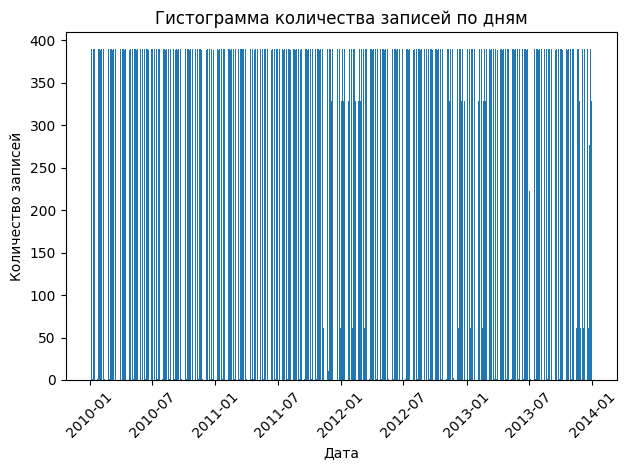

In [112]:
show_plot_number_of_data_per_date(special_data)

In [113]:
special_data.head()

,Ticker,Per,Date,Open,High,Low,Close,Vol,new_index,new_date
0,US1.JPM,1,2010-01-04 00:05:00,41.79,41.87,41.67,41.7775,457467,1.262564e+09,2010-01-04 00:05:00
1,US1.JPM,1,2010-01-04 00:06:40,41.79,41.92,41.79,41.8400,220390,1.262564e+09,2010-01-04 00:06:00
2,US1.JPM,1,2010-01-04 00:08:20,41.84,41.88,41.80,41.8100,143180,1.262564e+09,2010-01-04 00:07:00
3,US1.JPM,1,2010-01-04 00:10:00,41.82,41.86,41.80,41.8400,128338,1.262564e+09,2010-01-04 00:08:00
4,US1.JPM,1,2010-01-04 00:11:40,41.84,41.86,41.82,41.8350,108199,1.262564e+09,2010-01-04 00:09:00


In [114]:
# Получение часов из даты
special_data['hour']  = special_data['Date'].dt.hour

# Группировка по часам и выбор последней минуты в каждой группе
result = special_data.groupby('hour').apply(lambda x: x[x['Date'] == x['Date'].max()])

# Удаление временной колонки
result.drop(columns = ['hour'], inplace = True)
special_data.drop(columns = ['hour'], inplace = True)
print(result)

              Ticker  Per                Date     Open     High    Low  \
hour                                                                     
0    390712  US1.JPM    1 2013-12-31 00:58:20  57.8400  57.8500  57.84   
1    390736  US1.JPM    1 2013-12-31 01:38:20  57.9150  57.9350  57.91   
2    390742  US1.JPM    1 2013-12-31 02:58:20  58.1100  58.2020  58.09   
3    390766  US1.JPM    1 2013-12-31 03:38:20  58.1500  58.1900  58.15   
4    390774  US1.JPM    1 2013-12-31 04:58:20  58.2000  58.2100  58.20   
5    390810  US1.JPM    1 2013-12-31 05:58:20  58.2100  58.2100  58.19   
6    390826  US1.JPM    1 2013-12-31 06:25:00  58.1800  58.1800  58.17   
7    390842  US1.JPM    1 2013-12-31 07:58:20  58.3059  58.3100  58.30   
8    390878  US1.JPM    1 2013-12-31 08:58:20  58.3087  58.3100  58.30   
9    390886  US1.JPM    1 2013-12-31 09:11:40  58.2890  58.2900  58.28   
10   390910  US1.JPM    1 2013-12-31 10:58:20  58.2800  58.2800  58.27   
11   390946  US1.JPM    1 2013-12-31 1

C:\Users\Skiv2\AppData\Local\Temp\ipykernel_39644\2758553144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data['hour']  = special_data['Date'].dt.hour
C:\Users\Skiv2\AppData\Local\Temp\ipykernel_39644\2758553144.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_data.drop(columns = ['hour'], inplace = True)


In [115]:
# Функция для фильтрации последней минуты в часе
def filter_last_minute_in_hour(group):
    return group[group['Date'] == group['Date'].max()]

def minute_to_hours_transfer(df):
    df.set_index('Date', inplace = True)
    return df.groupby(pd.Grouper(freq='H')).last()

def minute_to_day_transfer(df):
    return df.groupby(df['Date'].dt.date).apply(lambda x: x.nlargest(1, columns='Date'))

# Вычисление последней минуты последнего дня в неделе
def last_minute_of_last_weekday(group):
    return group[group.dt.weekday == group.dt.weekday.max()].tail(1)

def minute_to_weeks_transfer(df):
    df.set_index('Date', inplace = True)
    return df.groupby(df.index.to_period('W')).last()

def minute_to_month_transfer(df):
    df.set_index('Date', inplace = True)
    return df.groupby(df.index.to_period('M')).last()

In [116]:
columns_to_drop = ['new_index', 'new_date']

# Проверка на существование каждой колонки перед удалением
for column in columns_to_drop:
    if column in special_data.columns:
        special_data = special_data.drop(columns=[column])

In [117]:
a = special_data.copy(deep = True)
b = special_data.copy(deep = True)
c = special_data.copy(deep = True)
z = special_data.copy(deep = True)

In [118]:
d = minute_to_hours_transfer(a)
e = minute_to_day_transfer(b)
e = e.droplevel(level=1)
f = minute_to_weeks_transfer(c)
g = minute_to_month_transfer(z)
f.reset_index(inplace = True)
f['Period_start'] = f['Date'].astype('datetime64[ns]')
f['Period_end'] = f['Period_start'] + pd.DateOffset(days = 6)
f.set_index('Period_end', inplace = True)
g['LastDayOfMonth'] = g.index.to_timestamp('M').to_period('D').end_time
g.reset_index(inplace = True)
g.set_index('LastDayOfMonth', inplace = True)

In [119]:
f

,Date,Ticker,Per,Open,High,Low,Close,Vol,Period_start
Period_end,,,,,,,,,
2010-01-10,2010-01-04/2010-01-10,US1.JPM,1,44.6700,44.68,44.62,44.6700,440793,2010-01-04
2010-01-17,2010-01-11/2010-01-17,US1.JPM,1,43.7501,43.77,43.67,43.6700,986938,2010-01-11
2010-01-24,2010-01-18/2010-01-24,US1.JPM,1,39.1227,39.19,39.12,39.1600,747817,2010-01-18
2010-01-31,2010-01-25/2010-01-31,US1.JPM,1,38.9800,39.01,38.91,38.9300,814191,2010-01-25
2010-02-07,2010-02-01/2010-02-07,US1.JPM,1,38.3600,38.40,38.33,38.3500,1034323,2010-02-01
...,...,...,...,...,...,...,...,...,...
2013-12-08,2013-12-02/2013-12-08,US1.JPM,1,56.0100,56.07,56.01,56.0500,371019,2013-12-02
2013-12-15,2013-12-09/2013-12-15,US1.JPM,1,56.2250,56.23,56.14,56.1700,275995,2013-12-09
2013-12-22,2013-12-16/2013-12-22,US1.JPM,1,57.7500,57.78,57.74,57.7600,412196,2013-12-16


In [120]:
g

,Date,Ticker,Per,Open,High,Low,Close,Vol
LastDayOfMonth,,,,,,,,
2010-01-31 23:59:59.999999999,2010-01,US1.JPM,1,38.9800,39.0100,38.910,38.9300,814191
2010-02-28 23:59:59.999999999,2010-02,US1.JPM,1,42.0300,42.0300,41.970,41.9800,800948
2010-03-31 23:59:59.999999999,2010-03,US1.JPM,1,44.8100,44.8300,44.700,44.7600,871910
2010-04-30 23:59:59.999999999,2010-04,US1.JPM,1,42.6100,42.6200,42.550,42.5700,464070
2010-05-31 23:59:59.999999999,2010-05,US1.JPM,1,39.5600,39.5800,39.470,39.5300,1040181
2010-06-30 23:59:59.999999999,2010-06,US1.JPM,1,36.6100,36.6400,36.600,36.6300,362296
2010-07-31 23:59:59.999999999,2010-07,US1.JPM,1,40.3900,40.3900,40.280,40.2800,1058889
2010-08-31 23:59:59.999999999,2010-08,US1.JPM,1,36.3700,36.4000,36.350,36.3700,403357
2010-09-30 23:59:59.999999999,2010-09,US1.JPM,1,38.1200,38.1300,38.070,38.0700,386518


In [121]:
a.head(40)

,Ticker,Per,Open,High,Low,Close,Vol
Date,,,,,,,
2010-01-04 00:05:00,US1.JPM,1,41.7900,41.8700,41.6700,41.7775,457467
2010-01-04 00:06:40,US1.JPM,1,41.7900,41.9200,41.7900,41.8400,220390
2010-01-04 00:08:20,US1.JPM,1,41.8400,41.8800,41.8000,41.8100,143180
2010-01-04 00:10:00,US1.JPM,1,41.8200,41.8600,41.8000,41.8400,128338
2010-01-04 00:11:40,US1.JPM,1,41.8400,41.8600,41.8200,41.8350,108199
2010-01-04 00:13:20,US1.JPM,1,41.8300,41.9900,41.8200,41.9500,254078
2010-01-04 00:15:00,US1.JPM,1,41.9500,42.0000,41.8400,41.9950,168718
2010-01-04 00:16:40,US1.JPM,1,41.9950,42.0000,41.9000,41.9200,101093
2010-01-04 00:18:20,US1.JPM,1,41.9200,41.9700,41.9100,41.9399,74529


In [122]:
d

,Ticker,Per,Open,High,Low,Close,Vol
Date,,,,,,,
2010-01-04 00:00:00,US1.JPM,1.0,42.0800,42.0800,42.030,42.0790,91636.0
2010-01-04 01:00:00,None,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04 02:00:00,US1.JPM,1.0,42.3199,42.3799,42.311,42.3500,100837.0
2010-01-04 03:00:00,US1.JPM,1.0,42.4500,42.4700,42.450,42.4500,99980.0
2010-01-04 04:00:00,US1.JPM,1.0,42.4400,42.4400,42.410,42.4300,63472.0
...,...,...,...,...,...,...,...
2013-12-31 13:00:00,US1.JPM,1.0,58.2600,58.2700,58.260,58.2674,5168.0
2013-12-31 14:00:00,US1.JPM,1.0,58.2350,58.2350,58.220,58.2251,15117.0
2013-12-31 15:00:00,US1.JPM,1.0,58.2300,58.2400,58.220,58.2300,16068.0


In [123]:
e.head(10)

,Ticker,Per,Date,Open,High,Low,Close,Vol
Date,,,,,,,,
2010-01-04,US1.JPM,1,2010-01-04 17:31:40,42.8850,42.89,42.85,42.850,312873
2010-01-05,US1.JPM,1,2010-01-05 17:31:40,43.6900,43.70,43.66,43.670,342934
2010-01-06,US1.JPM,1,2010-01-06 17:31:40,43.9000,43.92,43.90,43.910,135930
2010-01-07,US1.JPM,1,2010-01-07 17:31:40,44.7700,44.82,44.77,44.810,307549
2010-01-08,US1.JPM,1,2010-01-08 17:31:40,44.6000,44.67,44.59,44.670,219077
2010-01-09,US1.JPM,1,2010-01-09 00:00:00,44.6700,44.68,44.62,44.670,440793
2010-01-11,US1.JPM,1,2010-01-11 17:31:40,44.5400,44.55,44.52,44.530,240096
2010-01-12,US1.JPM,1,2010-01-12 17:31:40,43.4400,43.47,43.43,43.470,397544
2010-01-13,US1.JPM,1,2010-01-13 17:31:40,44.3200,44.35,44.30,44.305,355335


In [124]:
f

,Date,Ticker,Per,Open,High,Low,Close,Vol,Period_start
Period_end,,,,,,,,,
2010-01-10,2010-01-04/2010-01-10,US1.JPM,1,44.6700,44.68,44.62,44.6700,440793,2010-01-04
2010-01-17,2010-01-11/2010-01-17,US1.JPM,1,43.7501,43.77,43.67,43.6700,986938,2010-01-11
2010-01-24,2010-01-18/2010-01-24,US1.JPM,1,39.1227,39.19,39.12,39.1600,747817,2010-01-18
2010-01-31,2010-01-25/2010-01-31,US1.JPM,1,38.9800,39.01,38.91,38.9300,814191,2010-01-25
2010-02-07,2010-02-01/2010-02-07,US1.JPM,1,38.3600,38.40,38.33,38.3500,1034323,2010-02-01
...,...,...,...,...,...,...,...,...,...
2013-12-08,2013-12-02/2013-12-08,US1.JPM,1,56.0100,56.07,56.01,56.0500,371019,2013-12-02
2013-12-15,2013-12-09/2013-12-15,US1.JPM,1,56.2250,56.23,56.14,56.1700,275995,2013-12-09
2013-12-22,2013-12-16/2013-12-22,US1.JPM,1,57.7500,57.78,57.74,57.7600,412196,2013-12-16


In [125]:
def divide_by_100(number):
    if number > 10000:
        return number / 100
    else:
        return number

In [126]:
#d.Open = d.Open.apply(divide_by_100)
#d.High = d.High.apply(divide_by_100)
#d.Low = d.Low.apply(divide_by_100)
#d.Close = d.Close.apply(divide_by_100)
d.to_csv("sand500_MinuteToHour.csv")

In [127]:
#e.Open = e.Open.apply(divide_by_100)
#e.High = e.High.apply(divide_by_100)
#e.Low = e.Low.apply(divide_by_100)
#e.Close = e.Close.apply(divide_by_100)
e.to_csv("jpe_MinuteToDay.csv")

In [128]:
#f.Open = f.Open.apply(divide_by_100)
#f.High = f.High.apply(divide_by_100)
#f.Low = f.Low.apply(divide_by_100)
#f.Close = f.Close.apply(divide_by_100)
f.to_csv("jpe_MinuteToWeek.csv")

In [129]:
#g.Open = f.Open.apply(divide_by_100)
#g.High = f.High.apply(divide_by_100)
#g.Low = f.Low.apply(divide_by_100)
#g.Close = f.Close.apply(divide_by_100)
g.to_csv("sand500_MinuteToMonth.csv")

Text(0, 0.5, 'Цена, долл.')

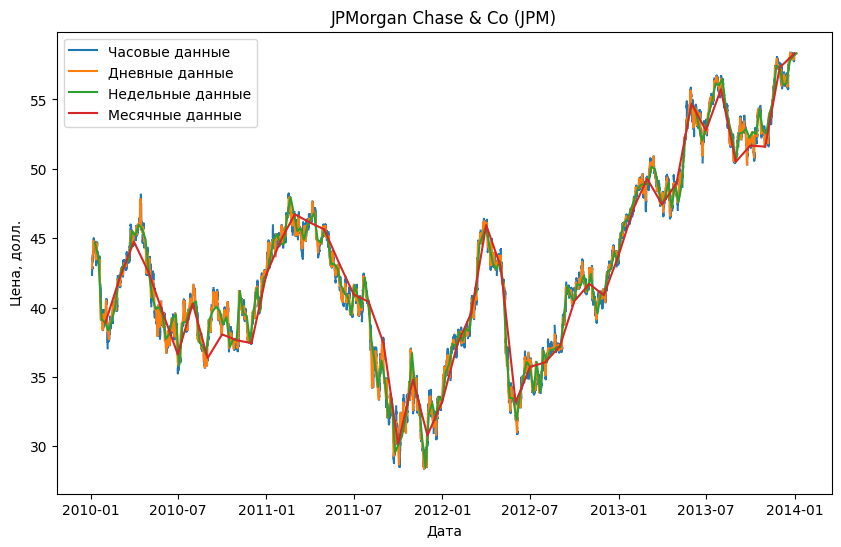

In [130]:
plt.figure(figsize=(10, 6))
#plt.plot(special_data.Close, label = "Минутные данные")
plt.plot(d.Close, label = "Часовые данные")
plt.plot(e.Close, label = "Дневные данные")
plt.plot(f.Close, label = "Недельные данные")
plt.plot(g.Close, label = "Месячные данные")
plt.legend()
plt.title("JPMorgan Chase & Co (JPM)")
plt.xlabel("Дата")
plt.ylabel("Цена, долл.")